### Puxar base de dados

In [2]:
import pandas as pd

tabela = pd.read_csv("exportacoes_franca.csv")
display(tabela)

,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight
0,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",Europe,79360,14150
1,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",European Union (EU),79360,14150
2,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",Europe,69412,9385
3,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",European Union (EU),69412,9385
4,2016,1,France,Alfenas - MG,901,"Coffee, whether or not roasted or decaffeinate...",9,"Coffee, tea, maté and spices",Europe,180914,57600
...,...,...,...,...,...,...,...,...,...,...,...
142355,2020,12,France,Vinhedo - SP,8424,Mechanical appliances (whether or not hand-ope...,84,"Nuclear reactors, boilers, machinery and mecha...",European Union (EU),2316,4
142356,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,Europe,27060,26400
142357,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,European Union (EU),27060,26400
142358,2020,12,France,Xapuri - AC,4409,Wood (including strips and friezes for parquet...,44,Wood and articles of wood; wood charcoal,Europe,31111,23045


### Informações Gerais

Quantas linhas têm a tabela? Existe algum valor vazio que deveria ser tratado?

In [4]:
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142360 entries, 0 to 142359
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Year             142360 non-null  int64 
 1   Month            142360 non-null  int64 
 2   Country          142360 non-null  object
 3   City             142360 non-null  object
 4   SH4 Code         142360 non-null  int64 
 5   SH4 Description  142360 non-null  object
 6   SH2 Code         142360 non-null  int64 
 7   SH2 Description  142360 non-null  object
 8   Economic Block   142360 non-null  object
 9   US$ FOB          142360 non-null  int64 
 10  Net Weight       142360 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 11.9+ MB


None

É possivel observar que não existem nenhuma entrada vazia, ou seja, não há nenhum valor nulo

### Como foi a evolução das exportações para a frança ao longo dos anos?

Crie uma tabela com os anos de 2016, 2017, 2018, 2019 e 2020 e o valor US$ de exportações

In [23]:
# Filtra apenas os anos desejados
anos = [2016, 2017, 2018, 2019, 2020]
df_franca_filtrado = df_franca[df_franca['Year'].isin(anos)]

# Agrupa por ano e soma o valor FOB (exportações)
evolucao_exportacoes = df_franca_filtrado.groupby('Year')['US$ FOB'].sum().reset_index()

# Formata os valores em milhões de dólares
evolucao_exportacoes['US$ FOB (milhões)'] = evolucao_exportacoes['US$ FOB'] / 1_000_000

# Mostra a tabela final
display(evolucao_exportacoes[['Year', 'US$ FOB (milhões)']])


# Outra forma de fazer a mesma coisa
# Agrupa por ano e soma o valor FOB (exportações)
tabela_anos_exportacoes = tabela[["Year", "US$ FOB" ]].groupby("Year").sum().reset_index()
def formatar(valor):
    valor_formatado = f"US$ {valor:,} milhões"
    return valor_formatado
tabela_anos_exportacoes["US$ FOB"] = tabela_anos_exportacoes["US$ FOB"].apply(formatar)

display(tabela_anos_exportacoes)

,Year,US$ FOB (milhões)
0,2016,4615.500082
1,2017,4448.705456
2,2018,5239.424416
3,2019,5218.723612
4,2020,3967.594810


,Year,US$ FOB
0,2016,"US$ 4,615,500,082 milhões"
1,2017,"US$ 4,448,705,456 milhões"
2,2018,"US$ 5,239,424,416 milhões"
3,2019,"US$ 5,218,723,612 milhões"
4,2020,"US$ 3,967,594,810 milhões"


Gerando um Gráfico

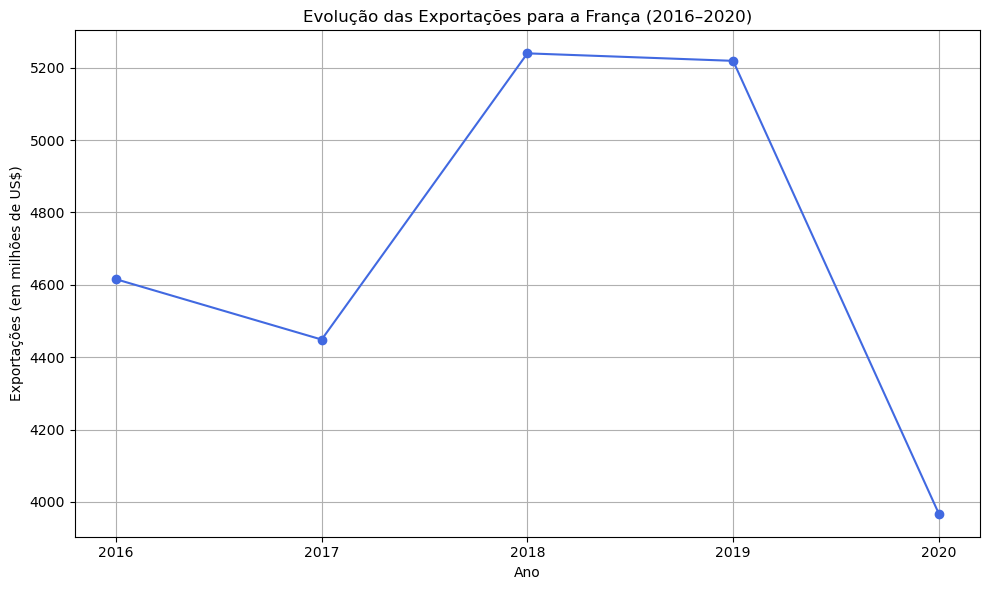

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que o DataFrame já foi filtrado como no primeiro bloco:
# df_franca -> já contém apenas dados da França

# Filtra os anos desejados
anos = [2016, 2017, 2018, 2019, 2020]
df_filtrado = df_franca[df_franca['Year'].isin(anos)]

# Agrupa e soma as exportações por ano
evolucao = df_filtrado.groupby('Year')['US$ FOB'].sum().reset_index()
evolucao['US$ FOB (milhões)'] = evolucao['US$ FOB'] / 1_000_000

# Plotando o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(evolucao['Year'], evolucao['US$ FOB (milhões)'], marker='o', linestyle='-', color='royalblue')
plt.title('Evolução das Exportações para a França (2016–2020)')
plt.xlabel('Ano')
plt.ylabel('Exportações (em milhões de US$)')
plt.grid(True)
plt.xticks(anos)
plt.tight_layout()
plt.show()


### Quais os produtos mais exportados ao longo de todo o período?

Queremos saber os produtos com maior valor US$ de exportação

### Em 2020 qual cidade mais exportou para a França?
Em valores US$

### Quais os produtos mais exportados (em US$) que as 2 maiores cidades (em exportação em 2020) exportaram?